In [2]:
import pandas as pd
from tensorflow.keras.models import load_model

model = load_model("xray_classifier.keras", compile=False)
df = pd.read_csv("xray_classifier.csv")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
images_1\00000071_007.png


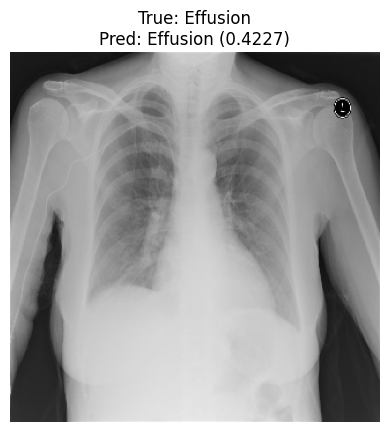

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

def plot_prediction(model, df, index):
    class_names = ['No Finding', 'Pneumothorax', 'Hernia', 'Consolidation', 'Fibrosis', 
               'Cardiomegaly', 'Mass', 'Nodule', 'Emphysema', 'Atelectasis', 
               'Effusion', 'Pleural_Thickening', 'Pneumonia', 'Infiltration', 'Edema']
    
    # Lấy path ảnh và nhãn thật
    img_path = df.loc[index, 'file_path']
    true_label = df.loc[index, 'true_label']
    
    # Load và preprocess ảnh
    img = image.load_img(img_path, target_size=(320,320))
    x = image.img_to_array(img)
    x = x / 255.0  # rescale
    x = np.expand_dims(x, axis=0)  # shape (1, H, W, C)
    
    # Predict
    pred_y = model.predict(x)
    pred_class_idx = np.argmax(pred_y, axis=1)[0]
    confidence = np.max(pred_y, axis=1)[0]
    
    pred_label = class_names[pred_class_idx]

    print(img_path)
    # Plot ảnh
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {pred_label} ({confidence:.4f})")
    plt.show()

### 
plot_prediction(model, df, index=23)
